# Example analysis of Secondary Grid for a given primary

In [1]:
import warnings
warnings.filterwarnings("ignore")
import src.sed_analysis_tools as st
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
# Assumed filter system
x_realistic = np.linspace(3.13, 4.70, 15)

## Creating a grid of secondaries

Total secondaries: 256


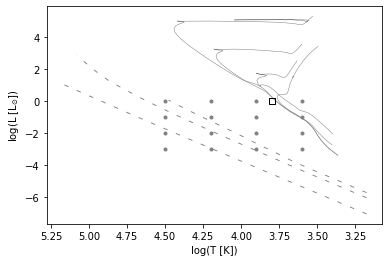

In [2]:
logT_A, logL_A = 3.8, 0
frac_err = 0.001
logT_B_list = np.linspace(3.6,4.5,4)
logL_B_list = np.linspace(-3,0,4)
logT_B_list, logL_B = np.meshgrid(logT_B_list, logL_B_list)
logT_B_list, logL_B_list = logT_B_list.flatten(), logL_B.flatten()

print('Total secondaries:', len(logT_B_list)*len(logL_B_list))
fig, ax = plt.subplots()
st.Plotter.plot_isochrone_and_wd(ax)
plt.scatter(logT_A, logL_A, marker='s', edgecolors='k',facecolor='none')
plt.scatter(logT_B_list, logL_B_list, marker='.', color='0.5')

In [3]:
grid = st.Grid(T_A = 10**logT_A *u.K, 
               L_A = 10**logL_A *u.solLum, 
               logT_B_list = logT_B_list, 
               logL_B_list = logL_B_list, 
               niter=50,
               frac_err=frac_err,
               name='test_grid',
               x=x_realistic)

## Calculating fitting parameter across the grid and plotting

In [4]:
grid.calculate_params(refit=False)

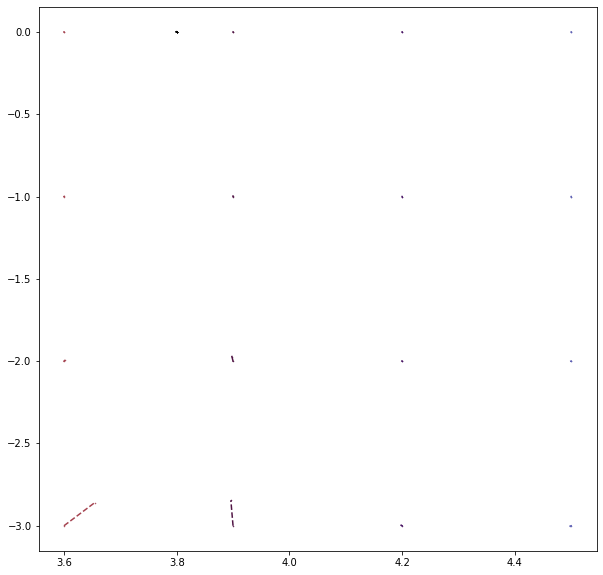

In [5]:
# Input and recovered positions connected by lines
# Average of all random realisation
grid.plot_Double_fitting_lines()

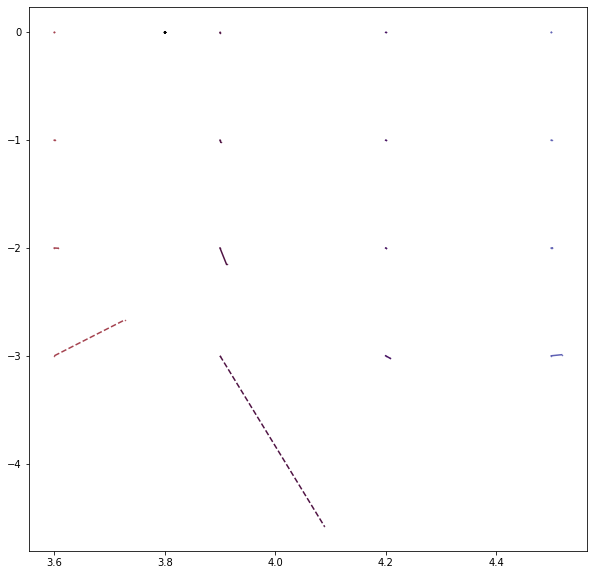

In [6]:
# Input and recovered positions connected by lines
# Only 1st random realisation
grid.plot_Double_fitting_lines(niter=0)

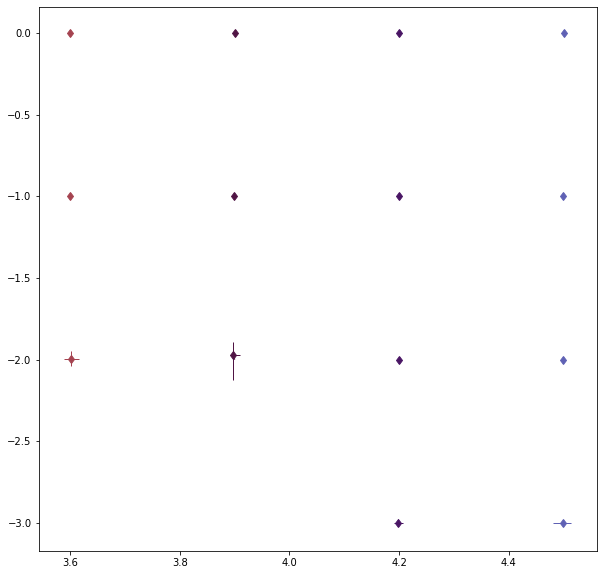

In [7]:
# Input and recovered positions connected by lines
# Diamond markers show Monte-Carlo errors
# Average of all random realisation
grid.plot_Double_fitting_points()

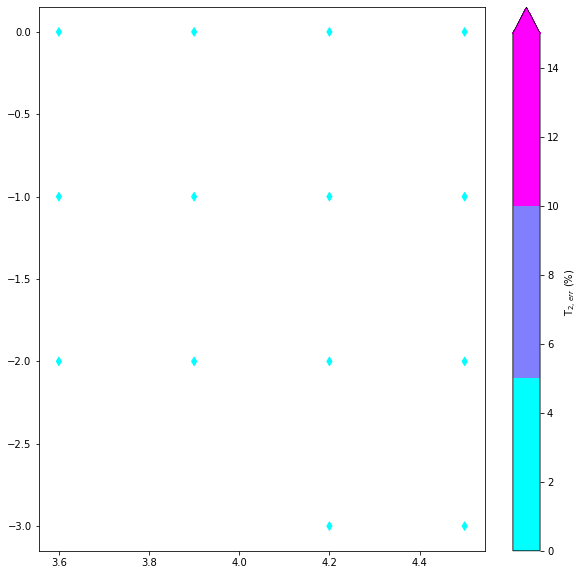

In [8]:
# Recovered % errors in T_2
grid.plot_Double_fitting_T2err()

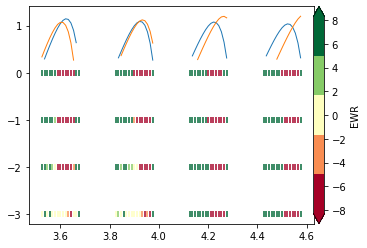

In [9]:
# SEDs of secondaries coloured with EWR
# Only 1st random realisation
grid.plot_sed_patches()

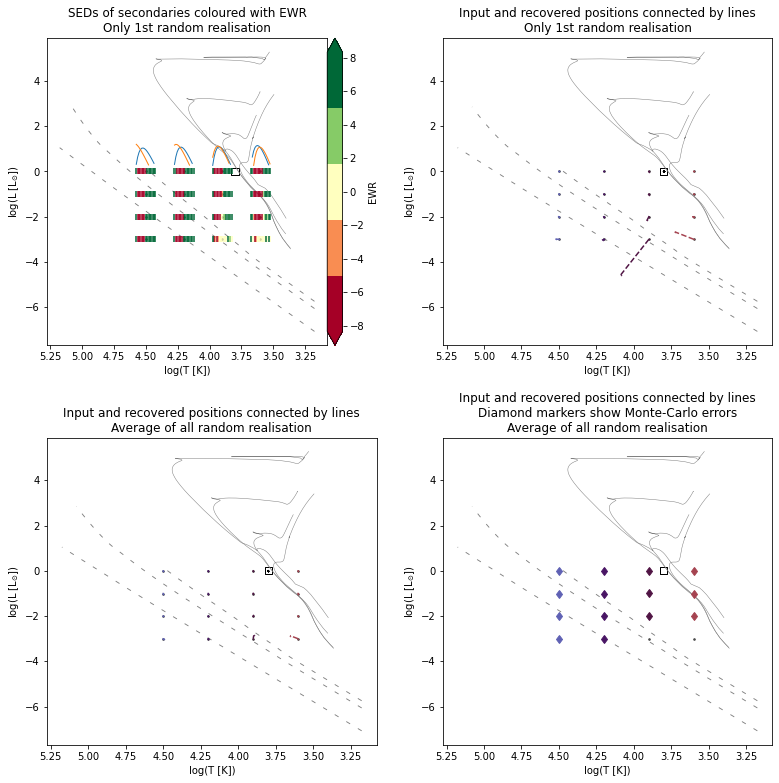

In [10]:
grid.plot()